# BLEU Score

In [1]:
import pandas as pd
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')

# Set model number and file paths
model_number = 4
finetuned_result = f"models_evaluate/model_{model_number}/model_output/finetuned_results.csv"
pretrained_result = f"models_evaluate/model_{model_number}/model_output/pretrained_results.csv"

def calculate_bleu(reference, candidate):
    '''
    Calculate BLEU score between a reference and a candidate sentence.
    
    Parameters:
    reference (str): The reference sentence.
    candidate (str): The candidate sentence.
    
    Returns:
    bleu_score (float): The BLEU score of the candidate sentence.
    '''
    # Tokenize the sentences
    reference_tokens = word_tokenize(reference)
    candidate_tokens = word_tokenize(candidate)

    # Calculate BLEU score
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))
    return bleu_score

def calculate_and_format(row):
    bleu_score = calculate_bleu(row['Source Text'], row['Predicted Neutral Text'])
    return row['Predicted Neutral Text'], row['Source Text'], bleu_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10150\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Fine-tuned Model BLEU Score

In [2]:
df_finetuned = pd.read_csv(finetuned_result, encoding='ISO-8859-1')

output_bleu_finetuned = df_finetuned.apply(calculate_and_format, axis=1).tolist()

# Create a DataFrame
df_bleu_finetuned = pd.DataFrame(output_bleu_finetuned, columns=['Predicted Neutral Text', 'Source Text', 'BLEU Score'])

# Add a sequence column
df_bleu_finetuned.insert(0, 'Sequence', range(1, 1 + len(df_bleu_finetuned)))

# Save to CSV
df_bleu_finetuned.to_csv(f'models_evaluate/model_{model_number}/evaluate_result/bleu_score_finetuned.csv', index=False)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_bleu_finetuned.shape[0]}")
print(f"Average BLEU score: {df_bleu_finetuned['BLEU Score'].mean()}")
print(f"Number of BLEU scores less than 0.2: {(df_bleu_finetuned['BLEU Score'] < 0.2).sum()}")

Total number of sentence pairs used for calculation: 257
Average BLEU score: 0.7762549271570811
Number of BLEU scores less than 0.2: 15


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

## Pretrained Model BLEU Score

In [3]:
df_pretrained = pd.read_csv(pretrained_result, encoding='ISO-8859-1')

output_bleu_pretrained = df_pretrained.apply(calculate_and_format, axis=1).tolist()

# Create a DataFrame
df_bleu_pretrained = pd.DataFrame(output_bleu_pretrained, columns=['Predicted Neutral Text', 'Source Text', 'BLEU Score'])

# Add a sequence column
df_bleu_pretrained.insert(0, 'Sequence', range(1, 1 + len(df_bleu_pretrained)))

# Save to CSV
df_bleu_pretrained.to_csv(f'models_evaluate/model_{model_number}/evaluate_result/bleu_score_pretrained.csv', index=False)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_bleu_pretrained.shape[0]}")
print(f"Average BLEU score: {df_bleu_pretrained['BLEU Score'].mean()}")
print(f"Number of BLEU scores less than 0.1: {(df_bleu_pretrained['BLEU Score'] < 0.1).sum()}")

Total number of sentence pairs used for calculation: 179
Average BLEU score: 0.2784490900864148
Number of BLEU scores less than 0.1: 102


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

## BLEU Score Visualizations

### Histograms

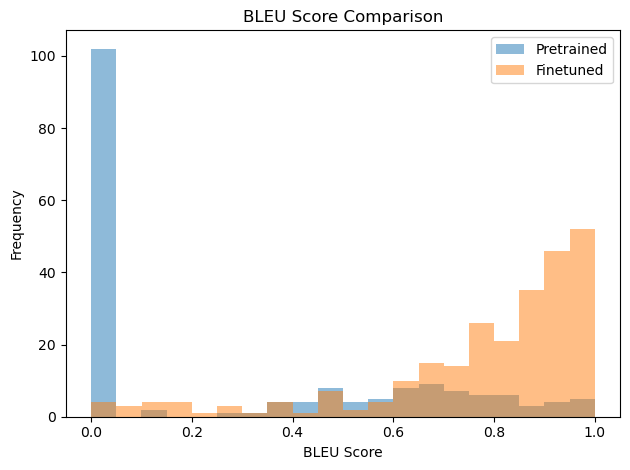

In [8]:
# Plot the histograms
plt.figure(tight_layout=True)
plt.hist(df_bleu_pretrained['BLEU Score'], bins=20, alpha=0.5, label='Pretrained')
plt.hist(df_bleu_finetuned['BLEU Score'], bins=20, alpha=0.5, label='Finetuned')
plt.title('BLEU Score Comparison')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### KDE Plots

c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


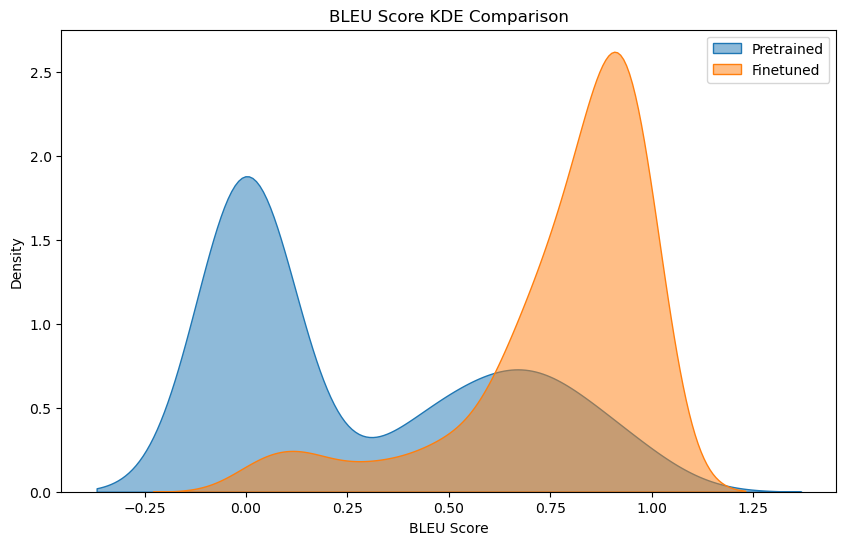

In [7]:
# Plot the KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_bleu_pretrained, x='BLEU Score', label='Pretrained', fill=True, alpha=0.5)
sns.kdeplot(data=df_bleu_finetuned, x='BLEU Score', label='Finetuned', fill=True, alpha=0.5)
plt.title('BLEU Score KDE Comparison')
plt.xlabel('BLEU Score')
plt.ylabel('Density')
plt.legend()

plt.show()

# Evaluate model performance with word2vec distance

In [ ]:
! pip install POT
import pandas as pd
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
import ot

# Load the Google's pre-trained Word2Vec model.
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Set model number and file paths
# model_number = 4
# finetuned_result = f"models_evaluate/model_{model_number}/model_output/finetuned_results.csv"
# pretrained_result = f"models_evaluate/model_{model_number}/model_output/pretrained_results.csv"

# Define a function to calculate Word Mover's Distance and format output
def calculate_and_format(row):
    distance = model.wmdistance(row['Source Text'], row['Predicted Neutral Text'])
    output = f"Sample: {row.name}\nSource Text: {row['Source Text']}\nPredicted Neutral Text: {row['Predicted Neutral Text']}\nWord Mover's Distance: {distance}\n\n"
    return distance, output

In [15]:
# Load the data
df_finetuned = pd.read_csv(finetuned_result)

# Apply the function to each row of the DataFrame
results = df_finetuned.apply(calculate_and_format, axis=1)

# Create a new DataFrame to store the distances and outputs
df_wmd_finetuned = pd.DataFrame(results.tolist(), columns=['wmdistance', 'output', 'wmd'])

# Print the first few rows of the DataFrame
print(df_wmd_finetuned.head())

                                          wmdistance  \
0  hamas, acronym of harakat al-muqawama al-islam...   
1  in 1960, following his returm from military se...   
2  the team debuted during the 2013 foundation cu...   
3  his final cry as the south tower of the world ...   
4  suad amiry (arabic: ); is an author and archit...   

                                              output       wmd  
0  hamas, acronym of harakat al-muqawama al-islam...  0.888618  
1  in 1960, following his returm from military se...  0.975905  
2  the team debuted during the 2013 foundation cu...  0.861697  
3  his chilling final cry as the south tower of t...  0.942873  
4  suad amiry (arabic: ); is an author and archit...  0.826565  


c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\10150\anaconda3\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

In [ ]:
df_pretrained = pd.read_csv(pretrained_result, encoding='ISO-8859-1')

# Apply the function to each row of the DataFrame
df_pretrained['wmdistance'], outputs = zip(*df_pretrained.apply(calculate_and_format, axis=1))

# Write the outputs to the file
with open(f'model_{model_number}/output_word2vec_pretrained.txt', 'w') as f:
    f.writelines(outputs)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_pretrained.shape[0]}")

# Print the maximum Word Mover's Distance
max_distance = df_pretrained['wmdistance'].max()
print(f"Maximum Word Mover's Distance: {max_distance}")

# Calculate and print the average Word Mover's Distance
average_distance = df_pretrained['wmdistance'].mean()
print(f"Average Word Mover's Distance: {average_distance}")

# Calculate and print the median Word Mover's Distance
median_distance = df_pretrained['wmdistance'].median()
print(f"Median Word Mover's Distance: {median_distance}")

Total number of sentence pairs used for calculation: 179
Maximum Word Mover's Distance: 0.6627682626788208
Average Word Mover's Distance: 0.29305029779357034
Median Word Mover's Distance: 0.36436424148204904


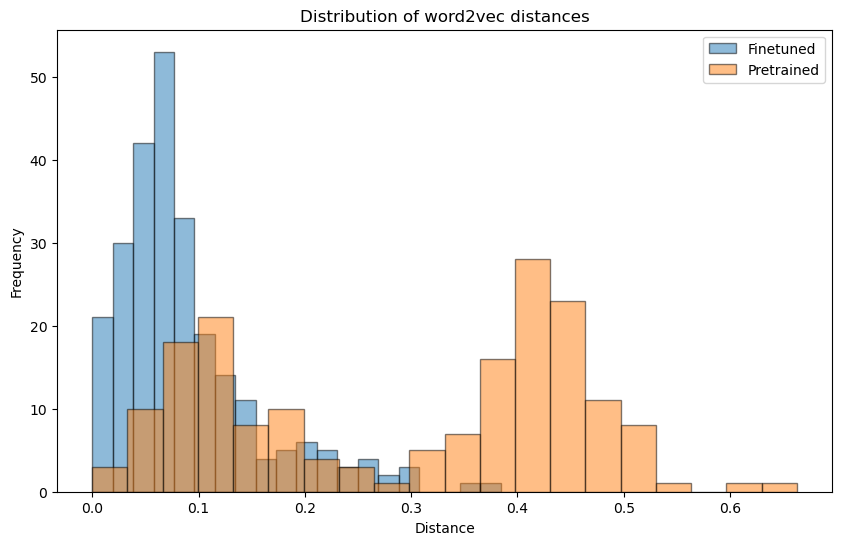

In [ ]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a histogram of the BLEU scores for the finetuned model
plt.hist(df_finetuned['wmdistance'], bins=20, edgecolor='black', alpha=0.5, label='Finetuned')

# Plot a histogram of the BLEU scores for the pretrained model
plt.hist(df_pretrained['wmdistance'], bins=20, edgecolor='black', alpha=0.5, label='Pretrained')

# Add a title and labels
plt.title('Distribution of word2vec distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


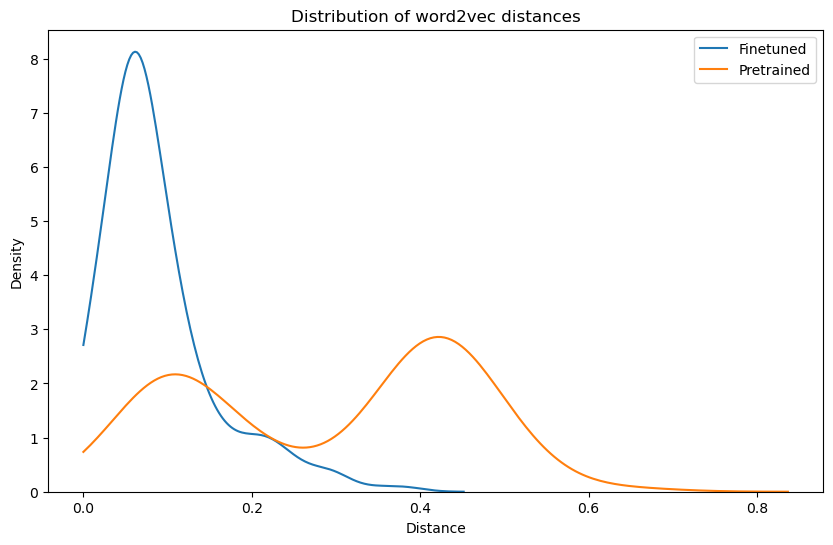

In [ ]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Create a KDE plot for the WMD values of the finetuned model
sns.kdeplot(df_finetuned['wmdistance'], label='Finetuned', clip=(0, 1))

# Create a KDE plot for the WMD values of the pretrained model
sns.kdeplot(df_pretrained['wmdistance'], label='Pretrained', clip=(0, 1))

# Add a title and labels
plt.title('Distribution of word2vec distances')
plt.xlabel('Distance')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()